# Lista 4 - Comitês de modelos

### Disciplina: Aprendizado de Máquina
### Professor: César Lincoln Cavalcante Mattos
### Período: 2022.1
### Aluna: Nathália Cavalcanti Martins

### Questão 1: Considere o conjunto de dados parcial disponível em enron_spam_data_prep.csv, organizado em 1001 colunas, sendo as 1000 primeiras colunas atributos textuais (codificados em TF-IDF) e a última coluna a saída. Os dados representam informações contidas em e-mails trocados internamente na empresa Enron em 2005. A saída é binária: 0, para mensagens regulares (''ham''); 1, para mensagens indesejáveis (''spam''). Maiores detalhes sobre os dados podem ser conferidos em https://github.com/MWiechmann/enron_spam_data.

### a) Considerando uma divisão de 70% dos padrões para treinamento e 30% para teste, avalie modelos de classificação binária nos dados em questão. Para tanto, use as abordagens abaixo:
**-Random Forest: Use grid-search para ajustar o número de classificadores base (valores 10, 20, : : :, 180, 190, 200) e a máxima profundidade (max depth, valores 2, 4, 6, 8 ou máxima (None no sklearn)).**

Observação: Use validações cruzadas em 10 folds no interior do grid-search.

In [60]:
# Importando bibliotecas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

In [2]:
# Importando a base de dados:
base_dados = np.genfromtxt("enron_spam_data_prep.csv", delimiter = ',')
base_dados.shape

(33716, 1001)

In [41]:
# Separando a base entre atributos (x) e target (y):
x = base_dados[:,:-1]
y = base_dados[:,-1]

In [42]:
# Verificando o tamanho de cada:
x.shape, y.shape

((33716, 1000), (33716,))

In [43]:
# Divsão dos dados em treino e teste:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [44]:
# Padronização
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [46]:
est = [10*x for x in range(1,21)]

In [47]:
# Parâmetros:
param_grid = { 
    'n_estimators': est,
    'max_depth' : [2,4,6,8],
}

In [45]:
# Modelo Random Forest
rfc=RandomForestClassifier(random_state=42)

In [48]:
# Grid Search
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10).fit(X_train_scaled, y_train)

In [49]:
CV_rfc.cv_results_

{'mean_fit_time': array([0.21841788, 0.33340938, 0.46331038, 0.59394054, 0.72889845,
        0.84233065, 0.93349438, 1.05024474, 1.16046357, 1.34921885,
        1.47254934, 1.59564538, 1.77745204, 1.8619961 , 2.00950499,
        2.15523829, 2.30319839, 2.40069237, 2.62608249, 2.76827865,
        0.32954178, 0.55369132, 0.83003399, 1.11566396, 1.35908747,
        1.49182343, 1.69383428, 1.95022976, 2.18998692, 2.28580496,
        2.35311387, 2.54144573, 2.72465982, 3.12555685, 3.49311814,
        3.82669392, 4.04979322, 4.2661011 , 4.50854795, 4.72275579,
        0.41258469, 0.76822853, 1.06764817, 1.4019963 , 1.66576352,
        1.82788889, 2.07216003, 2.37459085, 2.66091213, 2.92590392,
        3.42683647, 3.84183948, 4.30036256, 4.62856255, 4.96575711,
        5.36546435, 5.53505609, 5.84967594, 6.00168536, 6.33501663,
        0.48619905, 0.86213393, 1.25143416, 1.70720768, 2.01330912,
        2.65782852, 3.00872459, 3.60322943, 3.91797104, 4.06044095,
        4.44444885, 4.94159775,

In [51]:
# Melhores parâmetros:
CV_rfc.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [52]:
CV_rfc.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]})>

In [53]:
# "Treinando" o modelo com melhores parâmetros:
rfc = RandomForestClassifier(max_depth= 8, n_estimators= 200, random_state=42).fit(X_train_scaled,y_train)

In [54]:
# Acurácia com dados de treino:
rfc.score(X_train_scaled,y_train)

0.9155544256599296

### b) Para cada modelo, reporte os hiperparâmetros selecionados e as métricas de acurácia, revocação, precisão e F1-score nos dados de teste. Plote também a curva ROC e a curva Precision-Recall para cada modelo otimizado.

In [55]:
# Acurácia para os dados de teste:
pred = rfc.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9117152743450321

In [56]:
# Métricas: Acurácia, Revocação, Precisão e F1-score nos dados de teste:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      4945
         1.0       0.85      1.00      0.92      5170

    accuracy                           0.91     10115
   macro avg       0.93      0.91      0.91     10115
weighted avg       0.92      0.91      0.91     10115



In [57]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)>

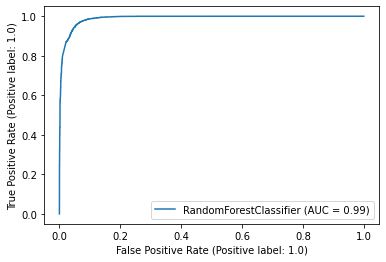

In [58]:
# Curva ROC
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test_scaled, y_test, ax=ax)

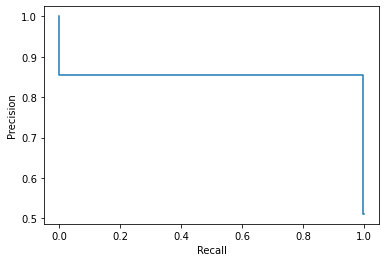

In [59]:
# Precision Recall
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()